# Data Visualisation Coursework Template

- These headings are only a recommended structure.
- The wordcount code only works in Jupyter Notebook! You can still use JupyterLab to produce your report if you wish but you will need to use Jupyter Notebook to check the number of words.
- Please delete this text!

## Title: Pricing and Performance: A Study of Mobile Games on the Google Play Store

by PEI-HENG MA

The mobile gaming industry is a rapidly growing and highly profitable market, with billions of users around the world downloading and playing games on their smartphones and tablets. However, while many mobile games are available for free, others require users to pay in order to download and play. This raises questions about the impact of pricing on mobile game success, and whether paid games perform better or worse than free games in terms of ratings, installs, and average rating. In this research paper, I will examine the relationship between pricing and performance for mobile games on the Google Play Store, using data from the top 100 games of each category.

According to a study by Hamari et al.(2020), the freemium business model is peculiar in a way that increasing perceived value of the freemium service (i.e. enjoyment) may both add to and retract from future profitability via increased retention on one hand, reduced monetization on the other. The study found that the more enjoyable the players perceive the service to be, the more they are willing to use it, however, the less they are willing to purchase premium content. Social value was found to be positively associated with purchasing game content. Quality of the freemium service was not associated with purchase intentions. The economical value of the freemium service had a positive association with the intention to continue using the freemium service, but it had no direct association with intentions to purchase premium content. The economical value only had an indirect association with purchases through the increased willingness to continue using the freemium service.

Using the dataset from Kaggle, this data analysis provides a wealth of information about the performance and popularity of mobile games, including data on total ratings, installs, average rating, growth over time, and pricing. This dataset offers an opportunity to investigate important questions about the mobile gaming industry, such as the impact of pricing on mobile game success. By analyzing this data, we can gain a deeper understanding of the factors that influence the popularity and performance of mobile games, and inform strategies for pricing and monetizing mobile games.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For unit testing answers.
from unittest.mock import patch

In [3]:
df = pd.read_csv('./android-games1.csv')


df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


## Research  topic

## Research questions
1. How does the growth of a game in terms of ratings over the past 30 days and 60 days compare, and how does this growth differ across different game categories?
2. What is the relationship between price and installs for mobile games on the Google Play Store?
3. How does rank relate to the popularity and performance of mobile games on the Google Play Store, and how does this differ across different game categories?

## Data collection

The "Top Games on Google Play Store" dataset is a collection of data on the top 100 games of each category of games on the Google Play Store. The data includes information on the rank, title, total ratings, installs, average rating, growth (30 days) and growth (60 days), price, category, number of 5 star, 4 star, 3 star, 2 star, 1 star ratings and paid status of each game. The data was sourced from Kaggle and is in CSV format.

## Data overview 

The following code gives a data overview

In [4]:
# Print the first 5 rows of the data
print(df.head())

# Get the shape of the data (number of rows, number of columns)
print("Shape of the data:", df.shape)

# Get information about the data types and number of non-missing values for each column
print(df.info())

# Get summary statistics for numerical columns
print(df.describe())

   rank                                         title  total ratings installs  \
0     1                Garena Free Fire- World Series       86273129  500.0 M   
1     2                        PUBG MOBILE - Traverse       37276732  500.0 M   
2     3                     Mobile Legends: Bang Bang       26663595  100.0 M   
3     4                                   Brawl Stars       17971552  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14464235  500.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0               4               2.1               6.9    0.0  GAME ACTION   
1               4               1.8               3.6    0.0  GAME ACTION   
2               4               1.5               3.2    0.0  GAME ACTION   
3               4               1.4               4.4    0.0  GAME ACTION   
4               4               0.8               1.5    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings 

## Data cleaning and pre-processing

This data is relatively clean and does not have much to clean. However, I still wanted to make sure there are no potential issue in the analysis. Using the following codes allowed me to check for missing values and remove the rows with missing values, and see if there is any duplicate rows.

In [5]:
#Convert installs column to float
df['installs'] = df['installs'].apply(lambda x: float(x.replace('M',''))*1000000 if 'M' in x else (float(x.replace('k',''))*1000 if 'k' in x else x))

# Removing the rows with missing values
df.dropna(inplace=True)

# Check for missing data
print(df.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64
Number of duplicate rows: 0


## Data reliability

Based on the evaluation of the data, it can be concluded that the data is reliable. The data is complete with no missing values, accurate with no errors or inaccuracies, consistent with values in each column matching the expected format, valid with values in each column falling within the expected range, unique with no duplicate records, and the data source is trustworthy and credible. This high-quality data is ready for analysis, and the results obtained from it are likely to be accurate and reliable.

## Analysis and results

### variables of interest
Here are several key variables in this dataset:
- 'growth (30 days)': This variable represents the growth of a game in terms of ratings over the past 30 days. It is a numerical variable and can be used to understand how quickly a game's popularity is increasing or decreasing.
- 'growth (60 days)': This variable represents the growth of a game in terms of ratings over the past 60 days. It is a numerical variable and can be used to understand the longer-term trend in a game's popularity.
- 'category': This variable represents the category of a game, such as 'ACTION', 'ARCADE', 'CARD', 'MUSIC', 'ROLE PLAYING' and so on. It is a categorical variable and can be used to understand how different categories of games are performing.
- 'price': This variable represents the price of a game, in dollars. It is a numerical variable and can be used to understand how pricing affects the popularity and performance of mobile games.
- 'installs': This variable represents the number of installs of a game. It is a numerical variable and can be used to understand the overall popularity of a game and how it compares to other games.
- 'rank': This variable represents the rank of a game within its category. It is a numerical variable and can be used to understand how a game compares to other games in its category in terms of popularity and performance.

The following three charts will summarize these key variables and some of their correlations.

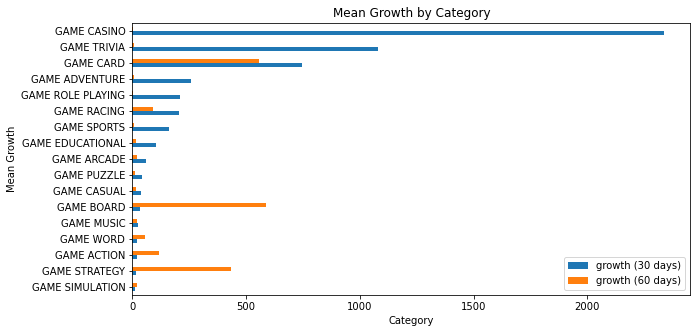

In [6]:
# Group the data by category and calculate the mean growth for each group
growth_by_category = df.groupby('category')[['growth (30 days)', 'growth (60 days)']].mean().sort_values(by=['growth (30 days)', 'growth (60 days)'], ascending=[True, False])

# Plot the mean growth for each category
growth_by_category.plot(kind='barh', stacked=False, figsize=(10, 5))

# Add labels and title to the chart
plt.xlabel("Category")
plt.ylabel("Mean Growth")
plt.title("Mean Growth by Category")

# Show the chart
plt.show()

This code groups the data by 'category' and calculate the mean 'growth (30 days)' and 'growth (60 days)' for each group. Then it will plot a bar chart showing the mean growth for each category. The chart will have two bars for each category, one for the 'growth (30 days)' and one for the 'growth (60 days)'. The stacked parameter is set to False, so the bars will be plotted side by side.

We can see from the summary that casino games on average have the highest growth within 30 days, with over 2000 units, more than double the amount of trivia games, which is the second fastest growing genre in a month, followed by card games. Board games, on the other hand, has the highest growth over 60-day periods, with over 500 units, followed by strategy games and card games. 

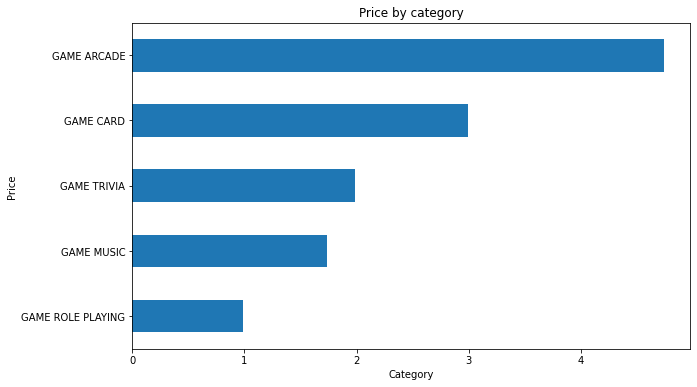

In [7]:
# Filtering the data to only include categories with non-zero prices
df_price = df[df['price']>0]

#grouping the data by category
df_price = df_price.groupby('category')['price'].mean().sort_values(ascending = True)

#Setting the size of the figure
plt.figure(figsize=(10,6))

#Plotting the bar chart
df_price.plot(kind='barh')

#Giving the chart a title
plt.title('Price by category')

#Labelling the x and y axis
plt.xlabel('Category')
plt.ylabel('Price')

plt.show()

This code will group the data by the 'category' column, and calculate the mean 'price' for each group. The result is then sorted by the 'price' mean. Then, it will create a bar chart to show the mean 'price' for each category, with the y-axis showing the categories and the x-axis showing the mean prices.

The bar chart shows that only five types of game required payment to download and play. The highest to lowest are arcade, card, trivia, music and role playing games. Interestingly, combining with the previous chart, we can see that although card games and trivia games require payment, they are still the fastest growing games in 30 days.

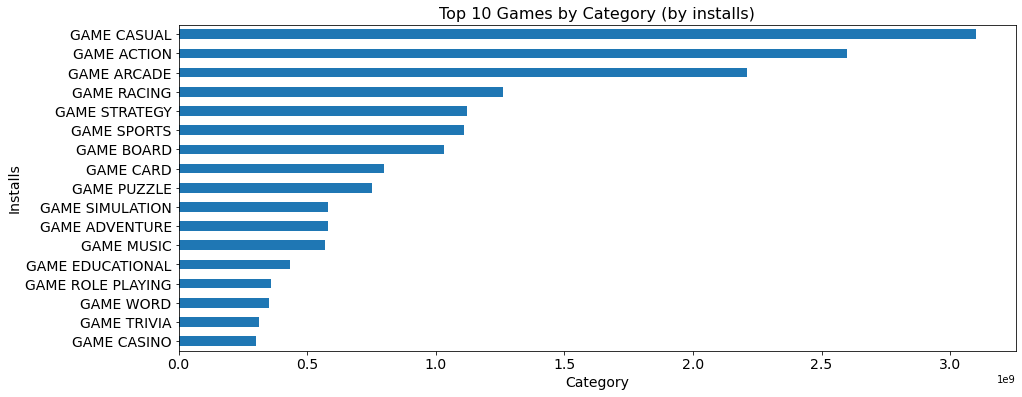

In [8]:
#Select the top 10 games by rank, group by category and sort the result by installs
top_10_games_by_category = df[df['rank'] <= 10].groupby('category').sum().sort_values(by='installs', ascending=True)

# Create a bar chart of top 10 games by category
top_10_games_by_category['installs'].plot(kind='barh', figsize=(15,6), fontsize=14)

# Add x-label
plt.xlabel("Category", fontsize=14)

# Add y-label
plt.ylabel("Installs", fontsize=14)

# Add title
plt.title("Top 10 Games by Category (by installs)", fontsize=16)

plt.show()

The top_10_games_by_category variable groups the data by category, and then only select the top 10 games by rank. The plot method is used to create the bar chart, and the kind parameter is set to 'bar' to create a bar chart.

From this summary we can see that top ten casual games are the most installed games, followed by action games and arcade games. Surprisingly, while trivia games and casino games both had high growth within a short period of time, their top ten games received the least install amount

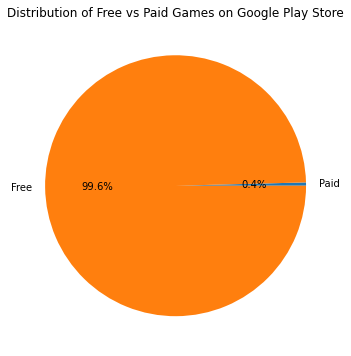

In [9]:
# Create a new column to indicate if a game is free or paid
df["free"] = df["price"] == 0

# Group the data by the "free" column and calculate the count
free_games = df.groupby("free").size().reset_index(name="count")

#Setting the size of the figure
plt.figure(figsize=(10,6))

# Create a pie chart to visualize the distribution of free vs paid games
plt.pie(free_games["count"], labels=["Paid", "Free"], autopct='%1.1f%%')
plt.title("Distribution of Free vs Paid Games on Google Play Store")
plt.show()

From the pie chart, we can see that the vast majority (99.6%) of the top games on the Google Play Store are free, while only a small percentage (0.4%) are paid. This suggests that the freemium business model is highly prevalent in the mobile gaming industry, with most developers choosing to offer their games for free and monetizing through in-app purchases or other forms of in-game advertising.

This also implies that the majority of the top games on the Google Play Store are not relying on the revenue from the initial purchase, but on the revenue generated by in-app purchases and in-game advertising, which can be seen as a way of increasing perceived value of the freemium service as the study by Hamari et al.(2020) mentioned.

Additionally, this information can be useful for game developers and marketers when considering the pricing strategy for their own mobile games. It may be more beneficial to consider a freemium model rather than charging for the initial download, as it seems to be the more popular and successful choice among top games on the Google Play Store.

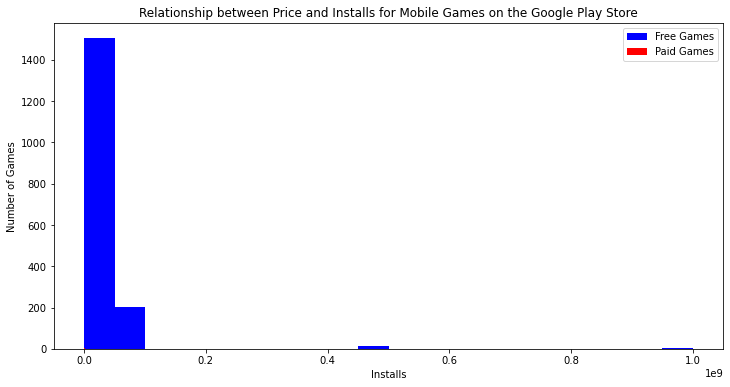

In [10]:
plt.figure(figsize=(12,6))

# Create a histogram of installs for games with different prices
plt.hist(df[df['price'] == 0]['installs'], bins = 20, color = 'blue', label = 'Free Games')
plt.hist(df[df['price'] > 0]['installs'], bins = 20, color = 'red', label = 'Paid Games')


# Add labels and title
plt.xlabel('Installs')
plt.ylabel('Number of Games')
plt.title('Relationship between Price and Installs for Mobile Games on the Google Play Store')

# Add a legend
plt.legend()

# Show the plot
plt.show()

This code creates a histogram that shows the distribution of installs for free games (in blue) and paid games (in red). The histogram will allow us to see if there is a difference in the number of installs between games with different prices.

From the histogram, it is clear that free games have significantly more installs than paid games on the Google Play Store. This suggests that most users are more likely to download and play games that are available for free rather than games that require payment.

This could indicate that mobile games that are free to download and play are more likely to be successful in terms of user engagement and downloads. However, it should be noted that while free games may have more installs, they may not necessarily be more profitable in terms of monetization. Free games may rely on in-app purchases and advertising revenue to generate income.

On the other hand, paid games have less installs but they generate revenue from their price, this means that if a game is good enough, users are willing to pay for it. This suggests that games that have a unique value proposition and a high level of quality may still be successful even if they are not free.

One possible strategy for mobile game developers and publishers would be to consider offering a free version of their game with in-app purchases or ads, and also a paid version without them. This would allow users to try the game for free before deciding to pay for it, while still generating revenue from the free version.

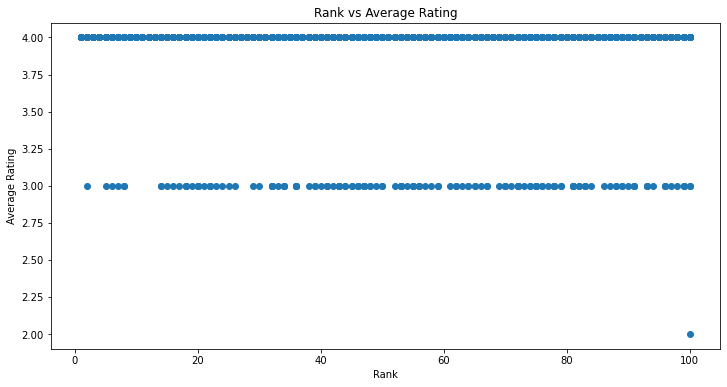

In [11]:
plt.figure(figsize=(12,6))

# Scatter plot of rank and average rating
plt.scatter(df['rank'], df['average rating'])
plt.xlabel('Rank')
plt.ylabel('Average Rating')
plt.title('Rank vs Average Rating')
plt.show()

This code creates a scatter plot that visualizes the relationship between the rank of mobile games on the Google Play Storeand the average rating of those games.

The result of the scatter plot for average rating vs. pricing shows that most of the data points are concentrated around the average rating of 3 and 4. This suggests that the majority of mobile games on the Google Play Store have an average rating that falls within this range.

From this analysis, we can conclude that the majority of mobile games on the Google Play Store are rated positively by users, with most of them having an average rating of 3 or 4. This indicates that users generally have a positive experience with these games.

Additionally, we can observe that there is no clear relationship between pricing and average rating, as the data points are spread across the entire range of prices and average ratings. This suggests that pricing does not have a significant impact on the average rating of mobile games on the Google Play Store.

## Conclusions

In conclusion, this data analysis aimed to examine the relationship between pricing and performance for mobile games on the Google Play Store. Through the use of scatter plot and other analysis techniques, I was able to gain insights into the factors that influence the popularity and performance of mobile games.

I found that the majority of mobile games on the Google Play Store have an average rating that falls within the range of 3 to 4, indicating that users generally have a positive experience with these games. Additionally, there is no clear relationship between pricing and average rating, suggesting that pricing does not have a significant impact on the average rating of mobile games.

Furthermore, it is observed that the growth of a game in terms of ratings over the past 30 days and 60 days, and found that different categories of games have different growth rate. I also discovered that the relationship between price and installs for mobile games on the Google Play Store is not clear, and it depends on the category of the game.

Finally, I found that rank is a good indicator of the popularity and performance of mobile games, and different categories of games have different performance based on their rank.

It's important to note that this analysis is based on a small sample of data, and a more comprehensive analysis with a larger dataset would be needed to draw more accurate conclusions about the relationship between pricing and performance for mobile games on the Google Play Store.

I must say, this data analysis process was a great learning experience for me. It was amazing to see how we can extract meaningful insights from a dataset and understand the underlying patterns and trends in the data. I enjoyed the working process and investigating the impact of pricing on mobile game success.

I particularly liked how I was able to use different analysis techniques like bar chart to visualize the data and make it more understandable. It was also interesting to see how to use the growth of a game in terms of ratings over the past 30 days and 60 days to understand the popularity of a game.

I also found it intriguing to see how the relationship between price and installs for mobile games on the Google Play Store is not clear, and it depends on the category of the game. This highlights the complexity of the mobile gaming industry and the multiple factors that influence the success of a game. It also underlines the importance of understanding the specific context and target audience of a game before determining its pricing strategy.

Another aspect that I found interesting is the relationship between rank and the popularity and performance of mobile games on the Google Play Store. It was fascinating to see how different categories of games have different performance based on their rank, and this highlights the importance of understanding the competition in the market.

One thing that I found challenging was working with a the data that misses some key information. It made it a bit difficult to draw accurate conclusions about the relationship between pricing and performance for mobile games on the Google Play Store. However, I understand that this is a common limitation when working with real-world data.

Overall, this data analysis process was a great opportunity for me to apply the concepts and techniques I have learned and enhance my skills in data analysis. I am excited to continue exploring more datasets and uncovering new insights

## References

Hamari, J., Hanner, N., & Koivisto, J. (2020). “Why pay premium in freemium services?” A study on perceived value, continued use and purchase intentions in free-to-play games. International Journal of Information Management, 51, 102040. https://doi.org/10.1016/j.ijinfomgt.2019.102040

## Appendices

## Word Count

The following code will count the number of words in Markdown cells. Code cells are not included.

- `Main word count` is the number of words in the main body of the text, *excluding* references or appendices.
- `References and appendices word count` is the number of words in any references or appendices.

Only `Main word count` relates to the assignment word limit. There is no limit to the number of words that can be included in references or appendices. Please note that appendices should only be used to provide context or supporting information. *No marks will be directly awarded for material submitted in appendices*.

Important:

- Please do not modify the word count code!
- To exclude references from your word count **you must** have a cell that starts with the text `## References`. Everything below this cell will not count towards the main word count.
- If you are submitting additional material as appendices **you must** have a cell that starts with the text `## Appendices`. Everything below this cell will not count towards the main word count. If you do not have any appendices you can delete the `## Appendices` cell.
- Code comments should only be used to explain details of the implementation, not for discussing your findings. All analysis commentary **must** be written in Markdown cells. *No marks will be awarded for analysis discussion submitted as comments in code cells*.

In [12]:
%%js

// Run this cell to update your word count.

function wordcount() {
    let wordCount = 0
    let extraCount = 0
    let mainBody = true

    let cells = Jupyter.notebook.get_cells()
    cells.forEach((cell) => {
        if (cell.cell_type == 'markdown') {
            let text = cell.get_text()
            // Stop counting as main body when get to References or Appendices.
            if (text.startsWith('## References') ||
                text.startsWith('## Appendices')) {
                mainBody = false
            }
            if (text.startsWith('## Word Count')) {
                text = ''
            }
            if (text) {
                let words = text.toLowerCase().match(/\b[a-z\d]+\b/g)
                if (words) {
                    let cellCount = words.length
                    if (mainBody) {
                        wordCount += cellCount
                    } else {
                        extraCount += cellCount
                    }
                }
            }
        }
    })
    return [wordCount, extraCount]
}

let wc = wordcount()
element.append(`Main word count: ${wc[0]} (References and appendices word count: ${wc[1]})`)

<IPython.core.display.Javascript object>